In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Scraping Data
# Step 9: OOP Concepts

In [2]:
def scrape_crypto_prices(crypto_symbol):
    #URL for crypto price data
    url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(crypto_symbol)

    try:
        # Making a request to the API
        response = requests.get(url, verify=True)
        response.raise_for_status()

        # Extracting price data from the response
        data = response.json()['data']['values']
        
        # Creating a DataFrame from the data
        df = pd.DataFrame(data)
        
        return df
    except requests.exceptions.RequestException as e:
        # Handle request exceptions
        print("Error fetching data for {}: {}".format(crypto_symbol, e))
        return None

# List of cryptocurrencies to scrape
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Dictionary to store crypto data
crypto_data = {crypto: scrape_crypto_prices(crypto) for crypto in cryptos}

# Processing and saving data for each cryptocurrency
for crypto, df in crypto_data.items():
    csv_filename = "{}_data.csv".format(crypto)
    print("\n{} Data:".format(crypto.capitalize()))
    if df is not None:
        # Printing the first few rows of the DataFrame
        print(df.head())

        # Renaming columns for clarity
        df.columns = ['time', 'open_price', 'close_price', 'high', 'low', 'volume']

        # Saving data to a CSV file
        df.to_csv(csv_filename, index=False)
        print("Data saved to {}".format(csv_filename))
    else:
        print("Failed to fetch data for {}".format(crypto))


Bitcoin Data:
               0             1             2             3             4  \
0  1700323200000  36677.727098  36850.397161  36672.999817  36696.920571   
1  1700326800000  36690.773654  36699.660881  36626.335548  36643.310531   
2  1700330400000  36644.522629  36762.437713  36632.947328  36734.676601   
3  1700334000000  36736.019297  36790.949234  36679.065969  36699.088650   
4  1700337600000  36698.782074  36728.950315  36569.651931  36618.564706   

              5  
0  3.979906e+08  
1  2.310575e+08  
2  1.691393e+08  
3  1.590051e+08  
4  1.884411e+08  
Data saved to bitcoin_data.csv

Ethereum Data:
               0            1            2            3            4  \
0  1700323200000  1953.521775  1965.399420  1953.436446  1964.833609   
1  1700326800000  1964.851236  1970.931492  1961.399229  1966.122941   
2  1700330400000  1966.167846  1970.546185  1959.657508  1968.648204   
3  1700334000000  1968.567857  1971.183391  1963.057959  1964.785011   
4  1700337600

# Step 2: Data Cleaning and Structuring
# Step 7:Save Results

In [3]:
class CryptoData:
    def __init__(self, crypto_symbol):
        # Initializing CryptoData object for a specific cryptocurrency
        self.crypto_symbol = crypto_symbol
        self.data = self.scrape_data()
        
        # If data is successfully fetched, clean it up
        if self.data is not None:
            self.clean_data()

    def scrape_data(self):
        #URL for fetching crypto data
        url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(self.crypto_symbol)

        try:
            # Making a request to the API
            response = requests.get(url, verify=True)
            response.raise_for_status()

            # Extracting price data from the response and convert it into a DataFrame
            data = response.json()['data']['values']
            df = pd.DataFrame(data)
            return df
        except requests.exceptions.RequestException as e:
            # Handling errors during data retrieval
            print("Error fetching data for {}: {}".format(self.crypto_symbol, e))
            return None

    def clean_data(self):
        # Renaming columns for clarity
        self.data.columns = ['time', 'opening_price', 'closing_price', 'high', 'low', 'volume']

    def save_to_csv(self):
        # Saving data to CSV file if data is available
        if self.data is not None:
            csv_filename = "{}_data.csv".format(self.crypto_symbol)
            self.data.to_csv(csv_filename, index=False)
            print("Data for {} saved to {}".format(self.crypto_symbol, csv_filename))
        else:
            # Printing a message if no data is available
            print("Failed to save data for {}".format(self.crypto_symbol))

# List of cryptocurrencies to fetch data for
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Creating CryptoData objects for each cryptocurrency
crypto_data_objects = {crypto: CryptoData(crypto) for crypto in cryptos}

# Saving data to CSV for each cryptocurrency
for crypto, crypto_data_object in crypto_data_objects.items():
    crypto_data_object.save_to_csv()

Data for bitcoin saved to bitcoin_data.csv
Data for ethereum saved to ethereum_data.csv
Data for xrp saved to xrp_data.csv


# step 3: Handling Missing Values

In [4]:
class CryptoData:
    def __init__(self, crypto_symbol):
        # Initializing CryptoData object for a specific cryptocurrency
        self.crypto_symbol = crypto_symbol
        # Fetching and storing the data when the object is created
        self.data = self.scrape_data()
        # If data is successfully fetched, clean it up
        if self.data is not None:
            self.clean_data()

    def scrape_data(self):
        # API for fetching crypto data
        url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(self.crypto_symbol)

        try:
            # Making a request to the API
            response = requests.get(url, verify=True)
            response.raise_for_status()

            # Extracting and convert data into a DataFrame
            data = response.json()['data']['values']
            df = pd.DataFrame(data)
            return df
        except requests.exceptions.RequestException as e:
            # Handling errors during data retrieval
            print("Error fetching data for {}: {}".format(self.crypto_symbol, e))
            return None

    def clean_data(self):
        # Renaming columns for clarity
        self.data.columns = ['time', 'opening_price', 'closing_price', 'high', 'low', 'volume']
        # Droping rows with missing values
        self.data = self.data.dropna()
        
    def save_to_csv(self):
        # Saving data to CSV file if data is available
        if self.data is not None:
            csv_filename = "{}_data.csv".format(self.crypto_symbol)
            self.data.to_csv(csv_filename, index=False)
            print("Data for {} saved to {}".format(self.crypto_symbol, csv_filename))
        else:
            # Printing a message if no data is available
            print("Failed to save data for {}".format(self.crypto_symbol))

# List of cryptocurrencies to fetch data for
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Creating CryptoData objects for each cryptocurrency
crypto_data_objects = {crypto: CryptoData(crypto) for crypto in cryptos}

# Saving data to CSV for each cryptocurrency
for crypto, crypto_data_object in crypto_data_objects.items():
    crypto_data_object.save_to_csv()


Data for bitcoin saved to bitcoin_data.csv
Data for ethereum saved to ethereum_data.csv
Data for xrp saved to xrp_data.csv


# Step 4:Data Transformation

In [5]:
class CryptoData:
    def __init__(self, crypto_symbol):
        # Initializing CryptoData object for a specific cryptocurrency
        self.crypto_symbol = crypto_symbol
        # Fetching and processing the data when the object is created
        self.data = self.scrape_data()
        if self.data is not None:
            self.clean_data()
            self.handle_missing_values()
            self.calculate_log_returns()
            self.save_to_csv()
            self.display_data()

    def scrape_data(self):
        # API for fetching crypto data
        url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(self.crypto_symbol)

        try:
            # Making a request to the API
            response = requests.get(url, verify=True)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            # Extracting and convert data into a DataFrame
            data = response.json()['data']['values']
            df = pd.DataFrame(data)
            return df
        except requests.exceptions.RequestException as e:
            # Handling errors during data retrieval
            print("Error fetching data for {}: {}".format(self.crypto_symbol, e))
            return None

    def clean_data(self):
        # Renaming columns for clarity
        self.data.columns = ['time', 'opening_price', 'closing_price', 'high', 'low', 'volume']
        # Drop rows with missing values
        self.data = self.data.dropna()
        
    def handle_missing_values(self):
        # Handling missing values by filling with column means
        for column in self.data.columns:
            self.data[column] = self.data[column].fillna(self.data[column].mean())

    def calculate_log_returns(self):
        # Calculating logarithmic returns for price columns
        price_columns = ['opening_price', 'closing_price', 'high', 'low']
        for col in price_columns:
            self.data[f'{col}_log_return'] = np.log(self.data[col] / self.data[col].shift(1))

    def save_to_csv(self):
        # Saving data to CSV file if data is available
        if self.data is not None:
            csv_filename = "{}_data.csv".format(self.crypto_symbol)
            self.data.to_csv(csv_filename, index=False)
            print("\nData for {} saved to {}".format(self.crypto_symbol, csv_filename))
        else:
            # Print a message if no data is available
            print("Failed to save data for {}".format(self.crypto_symbol))

    def display_data(self):
        # Displaying a subset of the processed data
        print("\nData for {} After Handling Missing Values and Calculating Log Returns:".format(self.crypto_symbol))
        print(self.data.head(10))

# List of cryptocurrencies to fetch and process data for
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Creating CryptoData objects for each cryptocurrency
crypto_data_objects = {crypto: CryptoData(crypto) for crypto in cryptos}



Data for bitcoin saved to bitcoin_data.csv

Data for bitcoin After Handling Missing Values and Calculating Log Returns:
            time  opening_price  closing_price          high           low  \
0  1700323200000   36677.727098   36850.397161  36672.999817  36696.920571   
1  1700326800000   36690.773654   36699.660881  36626.335548  36643.310531   
2  1700330400000   36644.522629   36762.437713  36632.947328  36734.676601   
3  1700334000000   36736.019297   36790.949234  36679.065969  36699.088650   
4  1700337600000   36698.782074   36728.950315  36569.651931  36618.564706   
5  1700341200000   36618.666654   36632.128160  36556.958456  36569.056862   
6  1700344800000   36568.215232   36600.651294  36469.026885  36527.614231   
7  1700348400000   36527.814328   36592.899919  36524.511974  36592.899919   
8  1700352000000   36593.258675   36599.520916  36486.541529  36490.784697   
9  1700355600000   36488.916723   36517.769149  36432.602997  36504.678178   

         volume  ope

# Step 5: Analysis

In [6]:
class CryptoData:
    def __init__(self, crypto_symbol):
        self.crypto_symbol = crypto_symbol
        self.data = self.scrape_data()

        if self.data is not None:
            self.clean_data()
            self.handle_missing_values()
            self.calculate_log_returns()
            self.save_to_csv()
            self.display_data()
            self.perform_analysis()

    def scrape_data(self):
        # Fetch crypto data from the API
        url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(self.crypto_symbol)

        try:
            response = requests.get(url, verify=True)
            response.raise_for_status()
            data = response.json()['data']['values']
            return pd.DataFrame(data)
        except requests.exceptions.RequestException as e:
            # Handle errors during data retrieval
            print("Error fetching data for {}: {}".format(self.crypto_symbol, e))
            return None

    def clean_data(self):
        # Rename columns for clarity
        self.data.columns = ['time', 'opening_price', 'closing_price', 'high', 'low', 'volume']
        # Drop rows with missing values
        self.data = self.data.dropna()
        
    def handle_missing_values(self):
        # Handle missing values by filling with column means
        self.data.fillna(self.data.mean(), inplace=True)

    def calculate_log_returns(self):
        # Calculate logarithmic returns for price columns
        price_columns = ['opening_price', 'closing_price', 'high', 'low']
        for col in price_columns:
            self.data[col + '_log_return'] = np.log(self.data[col] / self.data[col].shift(1))

    def save_to_csv(self):
        # Save data to CSV file if available
        if self.data is not None:
            csv_filename = "{}_data.csv".format(self.crypto_symbol)
            self.data.to_csv(csv_filename, index=False)
            print("\nData for {} saved to {}".format(self.crypto_symbol, csv_filename))
        else:
            # Print a message if no data is available
            print("Failed to save data for {}".format(self.crypto_symbol))

    def display_data(self):
        # Display a subset of the processed data
        print("\nData for {} After Handling Missing Values and Calculating Log Returns:".format(self.crypto_symbol))
        print(self.data.head(10))

    def perform_analysis(self):
        # Perform analysis on logarithmic returns
        print("\nAnalysis for {}:".format(self.crypto_symbol))

        # Calculate mean, median, and standard deviation for each log return column
        for col in ['opening_price_log_return', 'closing_price_log_return', 'high_log_return', 'low_log_return']:
            stats = self.data[col].describe()

            # Display analysis results
            print("\nAnalysis for {}:".format(col))
            print(stats)

            # Find date with the highest return for each log return column
            max_return_date = self.data.loc[self.data[col].idxmax(), 'time']
            max_return_value = self.data[col].max()

            # Display date with the highest return
            print("\nDate with the Highest Return for {}:".format(col))
            print("Date: {}".format(max_return_date))
            print("Highest Return Value: {}".format(max_return_value))

# List of cryptocurrencies to fetch, process, and analyze data for
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Create CryptoData objects for each cryptocurrency
crypto_data_objects = {crypto: CryptoData(crypto) for crypto in cryptos}



Data for bitcoin saved to bitcoin_data.csv

Data for bitcoin After Handling Missing Values and Calculating Log Returns:
            time  opening_price  closing_price          high           low  \
0  1700323200000   36677.727098   36850.397161  36672.999817  36696.920571   
1  1700326800000   36690.773654   36699.660881  36626.335548  36643.310531   
2  1700330400000   36644.522629   36762.437713  36632.947328  36734.676601   
3  1700334000000   36736.019297   36790.949234  36679.065969  36699.088650   
4  1700337600000   36698.782074   36728.950315  36569.651931  36618.564706   
5  1700341200000   36618.666654   36632.128160  36556.958456  36569.056862   
6  1700344800000   36568.215232   36600.651294  36469.026885  36527.614231   
7  1700348400000   36527.814328   36592.899919  36524.511974  36592.899919   
8  1700352000000   36593.258675   36599.520916  36486.541529  36490.784697   
9  1700355600000   36488.916723   36517.769149  36432.602997  36504.678178   

         volume  ope

# Step 6: Visualization


Data for bitcoin saved to bitcoin_data.csv

Data for bitcoin After Handling Missing Values and Calculating Log Returns:
            time  opening_price  closing_price          high           low  \
0  1700323200000   36677.727098   36850.397161  36672.999817  36696.920571   
1  1700326800000   36690.773654   36699.660881  36626.335548  36643.310531   
2  1700330400000   36644.522629   36762.437713  36632.947328  36734.676601   
3  1700334000000   36736.019297   36790.949234  36679.065969  36699.088650   
4  1700337600000   36698.782074   36728.950315  36569.651931  36618.564706   

         volume  opening_price_log_return  closing_price_log_return  \
0  3.979906e+08                       NaN                       NaN   
1  2.310575e+08                  0.000356                 -0.004099   
2  1.691393e+08                 -0.001261                  0.001709   
3  1.590051e+08                  0.002494                  0.000775   
4  1.884411e+08                 -0.001014              

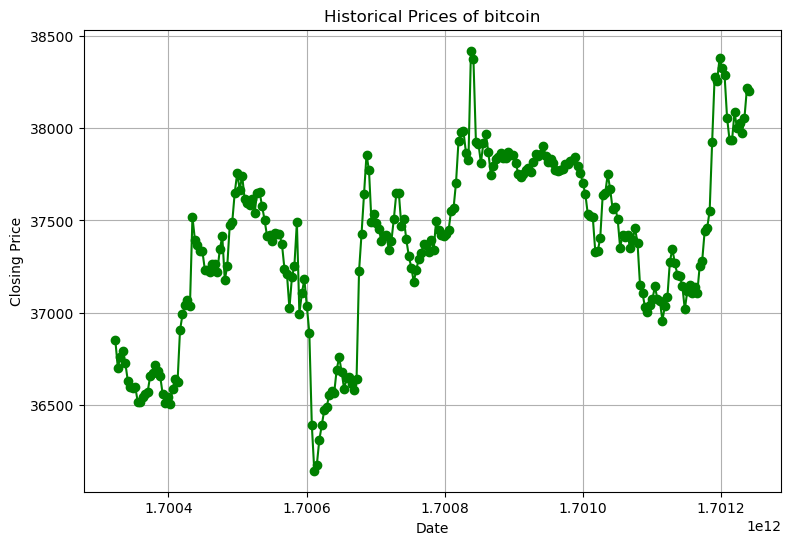

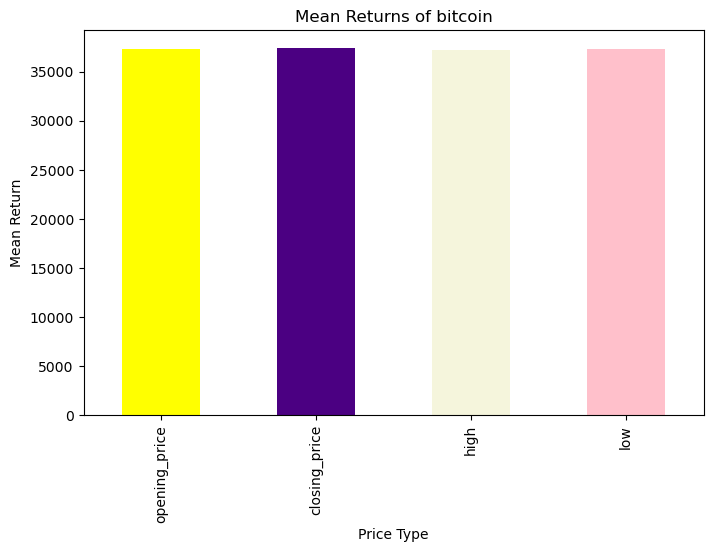


Data for ethereum saved to ethereum_data.csv

Data for ethereum After Handling Missing Values and Calculating Log Returns:
            time  opening_price  closing_price         high          low  \
0  1700323200000    1953.521775    1965.399420  1953.436446  1964.833609   
1  1700326800000    1964.851236    1970.931492  1961.399229  1966.122941   
2  1700330400000    1966.167846    1970.546185  1959.657508  1968.648204   
3  1700334000000    1968.567857    1971.183391  1963.057959  1964.785011   
4  1700337600000    1964.954108    1967.661757  1961.367752  1964.918503   

         volume  opening_price_log_return  closing_price_log_return  \
0  2.409897e+08                       NaN                       NaN   
1  2.398215e+08                  0.005783                  0.002811   
2  1.354636e+08                  0.000670                 -0.000196   
3  9.323608e+07                  0.001220                  0.000323   
4  7.878325e+07                 -0.001837                 -0.001

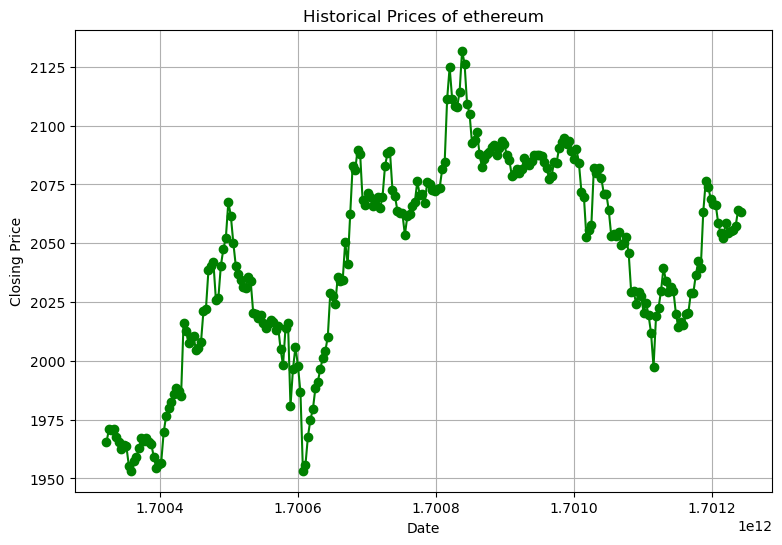

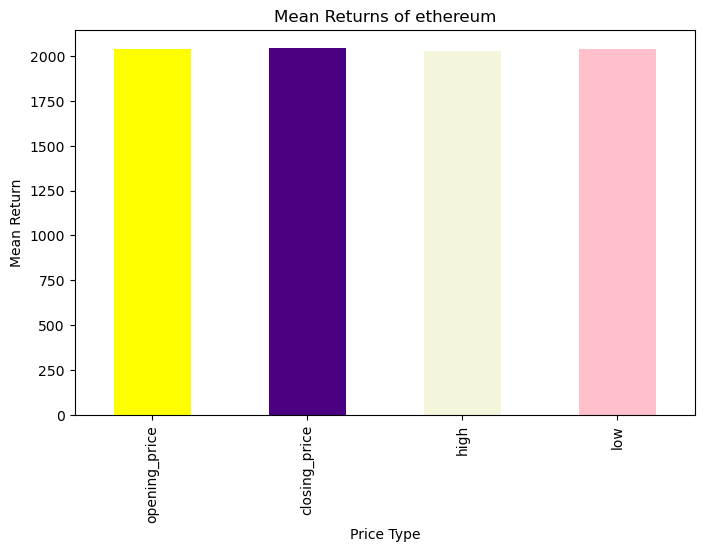


Data for xrp saved to xrp_data.csv

Data for xrp After Handling Missing Values and Calculating Log Returns:
            time  opening_price  closing_price      high       low  \
0  1700323200000       0.607613       0.610303  0.607041  0.607975   
1  1700326800000       0.607999       0.611128  0.606301  0.610902   
2  1700330400000       0.610698       0.613822  0.609682  0.613458   
3  1700334000000       0.613519       0.614591  0.612808  0.613437   
4  1700337600000       0.613443       0.614023  0.611794  0.611806   

         volume  opening_price_log_return  closing_price_log_return  \
0  2.002871e+07                       NaN                       NaN   
1  1.487182e+07                  0.000635                  0.001352   
2  2.636279e+07                  0.004429                  0.004398   
3  1.203202e+07                  0.004608                  0.001252   
4  1.036921e+07                 -0.000123                 -0.000926   

   high_log_return  low_log_return  
0     

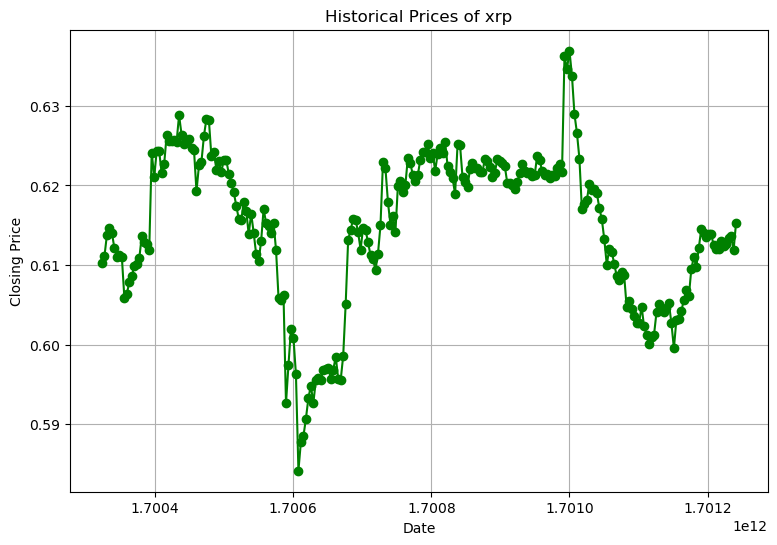

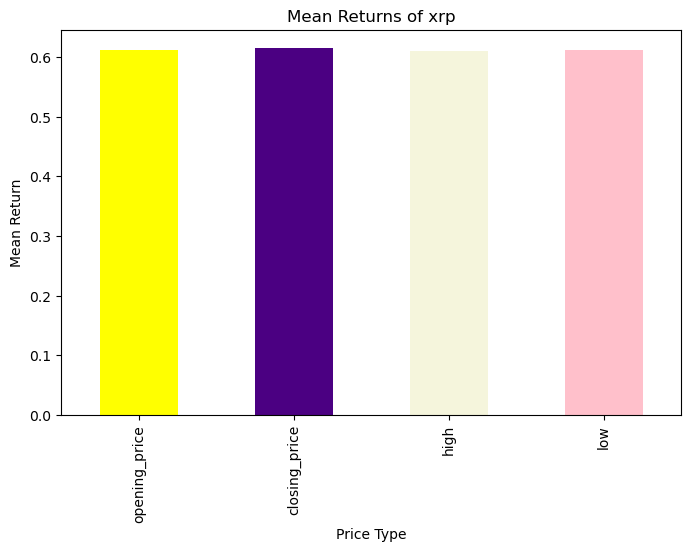

In [9]:
class CryptoData:
    def __init__(self, crypto_symbol):
        self.crypto_symbol = crypto_symbol
        self.data = self.scrape_data()
        if self.data is not None:
            self.clean_data()
            self.handle_missing_values()
            self.calculate_log_returns()
            self.save_to_csv()
            self.display_data()
            self.perform_analysis()
            self.create_visualizations()

    def scrape_data(self):
        # API endpoint for fetching crypto data
        url = "https://data.messari.io/api/v1/assets/{}/metrics/price/time-series".format(self.crypto_symbol)

        try:
            # Make a request to the API
            response = requests.get(url, verify=True)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            # Extract and convert data into a DataFrame
            data = response.json()['data']['values']
            df = pd.DataFrame(data)
            return df
        except requests.exceptions.RequestException as e:
            # Handle errors during data retrieval
            print("Error fetching data for {}: {}".format(self.crypto_symbol, e))
            return None

    def clean_data(self):
        # Rename columns for clarity
        self.data.columns = ['time', 'opening_price', 'closing_price', 'high', 'low', 'volume']
        # Drop rows with missing values
        self.data = self.data.dropna()
        
    def handle_missing_values(self):
        # Handle missing values by filling with column means
        for column in self.data.columns:
            self.data[column] = self.data[column].fillna(self.data[column].mean())

    def calculate_log_returns(self):
        # Calculate logarithmic returns for price columns
        price_columns = ['opening_price', 'closing_price', 'high', 'low']
        for col in price_columns:
            self.data[col + '_log_return'] = np.log(self.data[col] / self.data[col].shift(1))

    def save_to_csv(self):
        # Save data to CSV file if data is available
        if self.data is not None:
            csv_filename = "{}_data.csv".format(self.crypto_symbol)
            self.data.to_csv(csv_filename, index=False)
            print("\nData for {} saved to {}".format(self.crypto_symbol, csv_filename))
        else:
            # Print a message if no data is available
            print("Failed to save data for {}".format(self.crypto_symbol))

    def display_data(self):
        # Display a subset of the processed data
        print("\nData for {} After Handling Missing Values and Calculating Log Returns:".format(self.crypto_symbol))
        print(self.data.head())

    def perform_analysis(self):
        # Perform analysis on logarithmic returns
        print("\nAnalysis for {}:".format(self.crypto_symbol))

        # Calculate mean, median, and standard deviation for each log return column
        for col in ['opening_price_log_return', 'closing_price_log_return', 'high_log_return', 'low_log_return']:
            mean_return = self.data[col].mean()
            median_return = self.data[col].median()
            std_dev_return = self.data[col].std()

            # Display analysis results
            print("\nAnalysis for {}:".format(col))
            print("Mean: ", mean_return)
            print("Median: ", median_return)
            print("Standard Deviation: ", std_dev_return)

            # Find date with the highest return for each log return column
            max_return_date = self.data.loc[self.data[col].idxmax(), 'time']
            max_return_value = self.data[col].max()

            # Display date with the highest return
            print("\nDate with the Highest Return for {}:".format(col))
            print("Date: {}".format(max_return_date))
            print("Highest Return Value: {}".format(max_return_value))

    def create_visualizations(self):
        # Create and save visualizations
        self.plot_historical_prices()
        self.plot_mean_returns()
        
    #line chart
    def plot_historical_prices(self):
        # Plot historical closing prices and save the plot as an image
        plt.figure(figsize=(9, 6))
        plt.plot(self.data['time'], self.data['closing_price'], label='Closing Price',color='green',marker='o')
        plt.title("Historical Prices of {}".format(self.crypto_symbol))
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.grid(True)
        plt.savefig("{}_historical_prices.png".format(self.crypto_symbol))
        plt.show()
    #bar chart
    def plot_mean_returns(self):
        # Plot mean returns for each log return column and save the plot as an image
        price_columns = ['opening_price', 'closing_price', 'high', 'low']
        mean_returns = self.data[[col for col in price_columns]].mean()

        plt.figure(figsize=(8, 5))
        mean_returns.plot(kind='bar', color=['yellow', 'indigo', 'beige', 'pink'])
        plt.title("Mean Returns of {}".format(self.crypto_symbol))
        plt.xlabel("Price Type")
        plt.ylabel("Mean Return")
        plt.savefig("{}_mean_returns.png".format(self.crypto_symbol))
        plt.show()

# List of cryptocurrencies to fetch, process, and analyze data for
cryptos = ['bitcoin', 'ethereum', 'xrp']

# Create CryptoData objects for each cryptocurrency
crypto_data_objects = {crypto: CryptoData(crypto) for crypto in cryptos}

# Step 8:
## Summarize Findings

### Historical Prices:

Look at the line charts for how the prices of cryptocurrencies changed over time. Find any repeating patterns or big changes in the closing prices.

### Logarithmic Returns:

Study the average, middle, and spread of logarithmic returns for each cryptocurrency. Use these numbers to understand how much the prices go up and down and get an overall view of how well each cryptocurrency is doing.

### Date with Highest Return:

Find the dates when the prices of each cryptocurrency were the highest. Talk about why those dates might be special and if there were any important events that caused the prices to go up so much.


### Visualizations:

Look at the line chart to see trends and important moments in the price history. Use a bar chart to compare the average returns and figure out which type of price change (opening, closing, high, low) usually gives more money.


### Limitations and Considerations:

Point out anything that might make the data or analysis not perfect. This could be missing information, things you had to guess, or stuff you didn't think about.